In [1]:
# import de deep learning

# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
df_2018 = pd.read_csv('Data/flujo-vehicular-2018.csv')
df_2019 = pd.read_csv('Data/flujo-vehicular-2019.csv')
df_2020 = pd.read_csv('Data/flujo-vehicular-2020.csv')
df_2021 = pd.read_csv("Data/flujo-vehicular-2021.csv")
df_2020.head()

C:\Users\migue\AppData\Local\Temp\ipykernel_8016\3445915655.py:4: DtypeWarning: Columns (0,2,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("Data/flujo-vehicular-2021.csv")


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


In [3]:
df_2021.head()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Tag - PosPago,Centro,Tag,19


In [4]:
df_2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678735 entries, 0 to 678734
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         678735 non-null  int64 
 1   fecha           678735 non-null  object
 2   mes             678735 non-null  object
 3   dia             678735 non-null  object
 4   dia_fecha       678735 non-null  int64 
 5   hora_inicio     678735 non-null  int64 
 6   hora_fin        678735 non-null  int64 
 7   estacion        678735 non-null  object
 8   tipo_vehiculo   678735 non-null  object
 9   forma_pago      678735 non-null  object
 10  observacion     678735 non-null  object
 11  sentido         678735 non-null  object
 12  cantidad_pasos  678735 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 67.3+ MB


In [5]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029367 entries, 0 to 3029366
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año de Fecha Operativa  object
 1   Cat Cobrada             object
 2   Día de Fecha Operativa  object
 3   Hora HH                 object
 4   ID Peaje                object
 5   Mes de Fecha Operativa  object
 6   Observacion             object
 7   Sentido                 object
 8   Tipo Cobro              object
 9   Pasos                   object
dtypes: object(10)
memory usage: 231.1+ MB


In [6]:
nulls = pd.DataFrame(df_2021.isna().sum()/len(df_2021))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,Año de Fecha Operativa,0.0
1,Cat Cobrada,0.0
2,Día de Fecha Operativa,0.0
3,Hora HH,0.0
4,ID Peaje,0.0
5,Mes de Fecha Operativa,0.0
6,Observacion,0.0
7,Sentido,0.0
8,Tipo Cobro,0.0
9,Pasos,0.0


In [7]:
def agrupar_por_hora(dataframe, columna_hora, columna_pasos):
    try:
        df = dataframe.groupby(columna_hora)[columna_pasos].sum().reset_index()
    except KeyError:
        print("Advertencia: No se encontraron las columnas.", columna_hora,'y', columna_pasos)
        df = None
    return df

df_2018_hora = agrupar_por_hora(df_2018, 'hora_inicio', 'cantidad_pasos')
df_2019_hora = agrupar_por_hora(df_2019, 'hora_inicio', 'cantidad_pasos')
df_2020_hora = agrupar_por_hora(df_2020, 'hora_inicio', 'cantidad_pasos')


In [8]:
df_2021

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Tag - PosPago,Centro,Tag,19
...,...,...,...,...,...,...,...,...,...,...
3029362,2021,N/D,21,15,DEL,diciembre,Violación - Vía Cerrada,Provincia,Violación,1969
3029363,2021,N/D,21,15,ILL,diciembre,Violación - Normal,Centro,Violación,3
3029364,2021,N/D,21,15,ILL,diciembre,Violación - Vía Cerrada,Centro,Violación,2445
3029365,2021,N/D,21,15,ILL,diciembre,Violación - Vía Cerrada,Provincia,Violación,3880


In [9]:
df_2021["Hora HH"].value_counts()

Hora HH
11       117195
10       116418
12       115123
15       114674
13       114438
9        114405
14       113857
16       113681
8        111390
17       111340
7        107888
18       106594
19       100526
6         99207
20        95249
21        86845
22        78533
5         77861
23        68652
0         58169
4         55047
1         53628
2         49605
3         47899
10        40354
11        40349
12        39986
13        39670
9         39670
15        39539
16        39519
14        39495
17        39189
8         38371
18        38217
7         37058
19        36494
20        35378
6         34975
21        33406
22        30712
5         27953
23        26164
0         22806
1         21491
4         20797
2         20267
3         19270
Total        13
Name: count, dtype: int64

In [10]:
import re
def extraer_digitos(texto):
    digitos = re.findall(r'\d+', str(texto))
    return ''.join(digitos)


df_2021["Hora HH"] = df_2021["Hora HH"].apply(extraer_digitos)
df_2021

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Tag - PosPago,Centro,Tag,19
...,...,...,...,...,...,...,...,...,...,...
3029362,2021,N/D,21,15,DEL,diciembre,Violación - Vía Cerrada,Provincia,Violación,1969
3029363,2021,N/D,21,15,ILL,diciembre,Violación - Normal,Centro,Violación,3
3029364,2021,N/D,21,15,ILL,diciembre,Violación - Vía Cerrada,Centro,Violación,2445
3029365,2021,N/D,21,15,ILL,diciembre,Violación - Vía Cerrada,Provincia,Violación,3880


In [11]:
df_2021 = df_2021[df_2021["Hora HH"] != '']
len(df_2021["Hora HH"].unique())

24

In [12]:
df_2021["Hora HH"] = df_2021["Hora HH"].astype(int)
df_2021["Pasos"] = df_2021["Pasos"].astype(int)

C:\Users\migue\AppData\Local\Temp\ipykernel_8016\3306365158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["Hora HH"] = df_2021["Hora HH"].astype(int)
C:\Users\migue\AppData\Local\Temp\ipykernel_8016\3306365158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["Pasos"] = df_2021["Pasos"].astype(int)


In [13]:
df_2021_hora = df_2021.groupby("Hora HH")['Pasos'].sum().reset_index()

In [14]:
df_2021.keys()

Index(['Año de Fecha Operativa', 'Cat Cobrada', 'Día de Fecha Operativa',
       'Hora HH', 'ID Peaje', 'Mes de Fecha Operativa', 'Observacion',
       'Sentido', 'Tipo Cobro', 'Pasos'],
      dtype='object')

In [15]:
df_2021_hora.rename(columns={'Hora HH': 'hora_inicio', 'Pasos': 'cantidad_pasos'}, inplace=True)

In [16]:
def concadenar_columnas(df1, df2, df3, df4):
    df_unidos = pd.concat([df1, df2, df3, df4], axis=0)
    return df_unidos

df_horas = concadenar_columnas(df_2021_hora, df_2020_hora,df_2019_hora, df_2018_hora)
df_horas.sample()

,hora_inicio,cantidad_pasos
4,4,1014427


In [17]:
horas_agrupadas = df_horas.groupby('hora_inicio')['cantidad_pasos'].sum()

df_horas['cantidad_pasos'] = df_horas['hora_inicio'].map(horas_agrupadas)




In [18]:
df_horas

,hora_inicio,cantidad_pasos
0,0,6253135
1,1,4534617
2,2,3209113
3,3,2559794
4,4,3208274
...,...,...
19,19,21363395
20,20,18535039
21,21,14261323
22,22,10118769


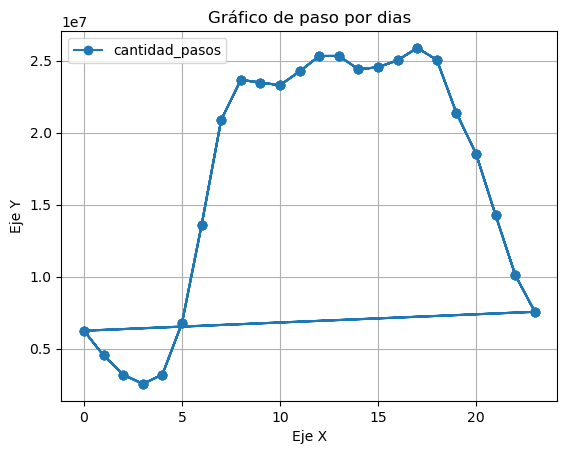

In [19]:
df_horas.plot(x='hora_inicio', y='cantidad_pasos', marker='o', linestyle='-')
plt.title('Gráfico de paso por dias')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.xticks([])
plt.grid(True)
plt.show()

In [20]:
df_horas.head()

,hora_inicio,cantidad_pasos
0,0,6253135
1,1,4534617
2,2,3209113
3,3,2559794
4,4,3208274


In [21]:
meses_dict = {
    'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04',
    'mayo': '05', 'junio': '06', 'julio': '07', 'agosto': '08',
    'septiembre': '09', 'octubre': '10', 'noviembre': '11', 'diciembre': '12'
}

df_2021['Mes de Fecha Operativa'] = df_2021['Mes de Fecha Operativa'].str.lower().map(meses_dict)

df_2021['Fecha'] = pd.to_datetime(df_2021['Año de Fecha Operativa'].astype(str) + '-' +
                             df_2021['Mes de Fecha Operativa'] + '-' +
                             df_2021['Día de Fecha Operativa'].astype(str))

df_2021.drop(['Año de Fecha Operativa', 'Mes de Fecha Operativa', 'Día de Fecha Operativa'], axis=1, inplace=True)


C:\Users\migue\AppData\Local\Temp\ipykernel_8016\1411552649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Mes de Fecha Operativa'] = df_2021['Mes de Fecha Operativa'].str.lower().map(meses_dict)
C:\Users\migue\AppData\Local\Temp\ipykernel_8016\1411552649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Fecha'] = pd.to_datetime(df_2021['Año de Fecha Operativa'].astype(str) + '-' +
C:\Users\migue\AppData\Local\Temp\ipykernel_8016\1411552649.py:13: SettingWithCopyWarning: 
A value is

In [22]:
df_2021

,Cat Cobrada,Hora HH,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,Fecha
0,Auto,0,ALB,Efectivo,Provincia,Efectivo,7,2021-04-01
1,Auto,0,ALB,Mercado Pago,Provincia,Mercado Pago,4,2021-04-01
2,Auto,0,ALB,Mercado Pago OCR,Centro,Mercado Pago,1,2021-04-01
3,Auto,0,ALB,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1,2021-04-01
4,Auto,0,ALB,Tag - PosPago,Centro,Tag,19,2021-04-01
...,...,...,...,...,...,...,...,...
3029361,N/D,15,DEC,Violación - Vía Cerrada,Centro,Violación,2330,2021-12-21
3029362,N/D,15,DEL,Violación - Vía Cerrada,Provincia,Violación,1969,2021-12-21
3029363,N/D,15,ILL,Violación - Normal,Centro,Violación,3,2021-12-21
3029364,N/D,15,ILL,Violación - Vía Cerrada,Centro,Violación,2445,2021-12-21


In [23]:
df_2021.head()

,Cat Cobrada,Hora HH,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,Fecha
0,Auto,0,ALB,Efectivo,Provincia,Efectivo,7,2021-04-01
1,Auto,0,ALB,Mercado Pago,Provincia,Mercado Pago,4,2021-04-01
2,Auto,0,ALB,Mercado Pago OCR,Centro,Mercado Pago,1,2021-04-01
3,Auto,0,ALB,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1,2021-04-01
4,Auto,0,ALB,Tag - PosPago,Centro,Tag,19,2021-04-01


In [24]:
df_2021.rename(columns={'Fecha': 'fecha', 'Pasos': 'cantidad_pasos'}, inplace=True)


C:\Users\migue\AppData\Local\Temp\ipykernel_8016\2133748246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.rename(columns={'Fecha': 'fecha', 'Pasos': 'cantidad_pasos'}, inplace=True)


In [25]:
df_semanas = pd.concat([df_2018[['fecha', 'cantidad_pasos']], df_2019[["fecha", 'cantidad_pasos']], df_2020[["fecha", 'cantidad_pasos']], df_2021[["fecha", 'cantidad_pasos']]])
df_semanas


,fecha,cantidad_pasos
0,2018-01-01,29
1,2018-01-01,9
2,2018-01-01,73
3,2018-01-01,39
4,2018-01-01,115
...,...,...
3029361,2021-12-21 00:00:00,2330
3029362,2021-12-21 00:00:00,1969
3029363,2021-12-21 00:00:00,3
3029364,2021-12-21 00:00:00,2445


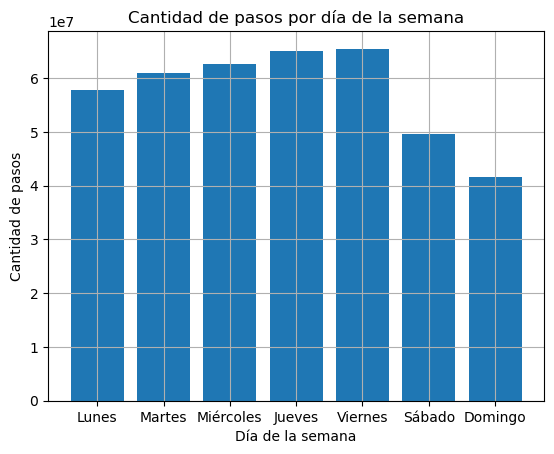

In [26]:
df_semanas['fecha'] = pd.to_datetime(df_semanas['fecha'])
df_semanas['dia_semana'] = df_semanas['fecha'].dt.dayofweek
flujo_vehicular_por_dia = df_semanas.groupby('dia_semana')['cantidad_pasos'].sum()
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.bar(dias_semana, flujo_vehicular_por_dia)
plt.title('Cantidad de pasos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de pasos')
plt.grid(True)
plt.show()

In [27]:
df_2021.head()

,Cat Cobrada,Hora HH,ID Peaje,Observacion,Sentido,Tipo Cobro,cantidad_pasos,fecha
0,Auto,0,ALB,Efectivo,Provincia,Efectivo,7,2021-04-01
1,Auto,0,ALB,Mercado Pago,Provincia,Mercado Pago,4,2021-04-01
2,Auto,0,ALB,Mercado Pago OCR,Centro,Mercado Pago,1,2021-04-01
3,Auto,0,ALB,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1,2021-04-01
4,Auto,0,ALB,Tag - PosPago,Centro,Tag,19,2021-04-01


In [28]:
df_2021["fecha"].value_counts()

fecha
2021-09-23    17174
2021-09-24    17170
2021-09-16    17152
2021-09-17    17058
2021-09-29    16938
              ...  
2021-06-20     5004
2021-12-25     4912
2021-01-01     4907
2021-05-01     4894
2021-05-23     4506
Name: count, Length: 365, dtype: int64

In [29]:
df_2021['cantidad_pasos'] = pd.to_numeric(df_2021['cantidad_pasos'], errors='coerce')
df_pasos_21 = df_2021.groupby('fecha')['cantidad_pasos'].sum().reset_index()
df_pasos_21.head()

C:\Users\migue\AppData\Local\Temp\ipykernel_8016\4022798826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['cantidad_pasos'] = pd.to_numeric(df_2021['cantidad_pasos'], errors='coerce')


,fecha,cantidad_pasos
0,2021-01-01,147196
1,2021-01-02,197407
2,2021-01-03,189422
3,2021-01-04,312226
4,2021-01-05,318915


In [30]:
df_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


In [31]:
def agrupar_y_sumar_pasos(df):
    df_seleccionado = df[['fecha', 'cantidad_pasos']].copy()
    df_seleccionado.rename(columns={'pasos': 'cantidad_pasos'}, inplace=True)
    df_agrupado = df_seleccionado.groupby('fecha', as_index=False)['cantidad_pasos'].sum()
    
    return df_agrupado

df_2020_pasos = agrupar_y_sumar_pasos(df_2020)
len(df_2020_pasos["cantidad_pasos"].unique())
df_2019_pasos = agrupar_y_sumar_pasos(df_2019)
df_2018_pasos = agrupar_y_sumar_pasos(df_2018)



In [32]:
df_pasos_21.rename(columns={'Pasos': 'cantidad_pasos'}, inplace=True)
df_pasos_21.keys()


Index(['fecha', 'cantidad_pasos'], dtype='object')

In [33]:
df_pasos_21.keys()

Index(['fecha', 'cantidad_pasos'], dtype='object')

In [34]:

df_unidos = pd.concat([df_2020_pasos, df_pasos_21, df_2019_pasos, df_2018_pasos], axis=0)
df_unidos.head()

,fecha,cantidad_pasos
0,2020-01-01,191034
1,2020-01-02,350026
2,2020-01-03,378523
3,2020-01-04,266216
4,2020-01-05,226755


In [35]:
def convertir_a_datetime(df, columna):
    
    if df[columna].dtype != 'datetime64[ns]':
        try:
            df[columna] = pd.to_datetime(df[columna])
            print(f"La columna '{columna}' se ha convertido a formato datetime correctamente.")
        except Exception as e:
            print(f"Error al convertir la columna '{columna}' a formato datetime: {e}")




In [36]:
convertir_a_datetime(df_unidos, 'fecha')
df_unidos.head()

La columna 'fecha' se ha convertido a formato datetime correctamente.


,fecha,cantidad_pasos
0,2020-01-01,191034
1,2020-01-02,350026
2,2020-01-03,378523
3,2020-01-04,266216
4,2020-01-05,226755


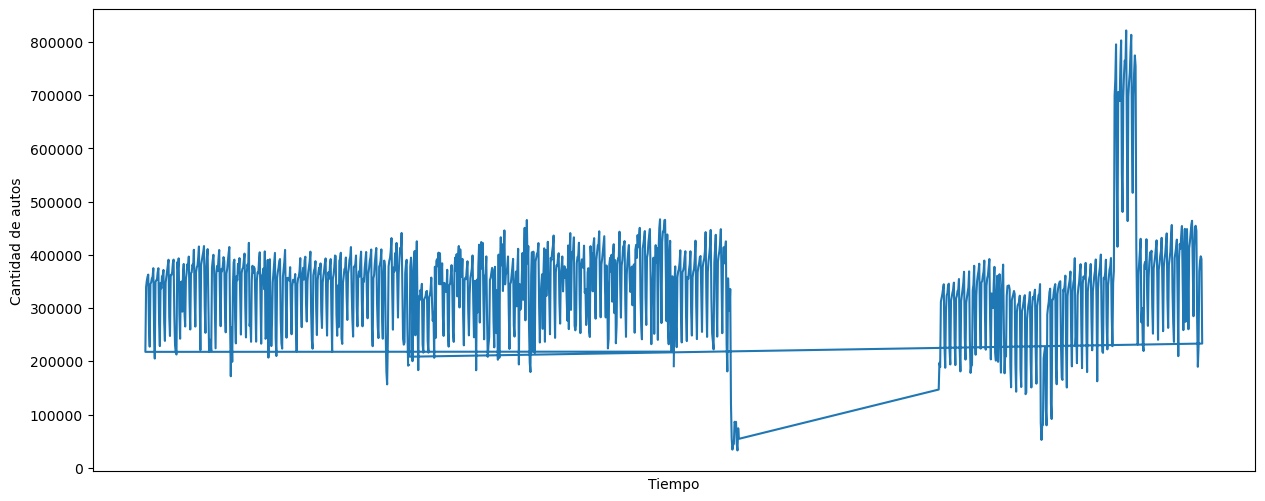

In [37]:
plt.figure(figsize = (15,6))
plt.plot(df_unidos["fecha"], df_unidos["cantidad_pasos"])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.xticks([])
plt.show()

In [38]:
df = df_unidos.reset_index()
df.rename(columns = {'fecha':'ds', 'cantidad_pasos':'y'}, inplace = True)
df.drop(columns="index", inplace=True)
df

,ds,y
0,2020-01-01,191034
1,2020-01-02,350026
2,2020-01-03,378523
3,2020-01-04,266216
4,2020-01-05,226755
...,...,...
1181,2018-12-27,382504
1182,2018-12-28,390882
1183,2018-12-29,261922
1184,2018-12-30,192016


In [39]:
pip install pystan


  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pystan-3.7.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.6.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.5.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.3.0-py3-none-any.whl.metadata (3.6 kB)
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.2.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached pystan-3.1.1-py3-none-any.whl.metadata (3.6 kB)
  Using cac

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\migue\AppData\Local\Temp\pip-install-r8oy4ja8\pystan_72e430c912b14b6bbfa0f558c5a4edb8\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [40]:
pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached holidays-0.47-py3-none-any.whl.metadata (23 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.5-cp311-cp311-win_amd64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is comp

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\migue\AppData\Local\Temp\pip-install-vqowit2k\pystan_ddb228fdd3c5473c88422f14fb5cc270\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [41]:
from fbprophet import Prophet


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
m = Prophet()
m.fit(df)

NameError: name 'Prophet' is not defined

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)